In [1]:
import pandas as pd
# reset colwitdth options when running all cells 
pd.reset_option('display.max_colwidth')
from textblob import TextBlob
import math


In [2]:
#!pip install -U textblob
#!python -m textblob.download_corpora

In [3]:
data = pd.read_json('processed_data/data_final_merged.json')
# remove columns that were unexpectedly generated during saving
# data.drop(columns=['level_0', 'index'], inplace=True)
data.tail(3)

,timestamp,hashtags,text,username,likes,replies,retweets,Open,Close,PriceUp
23516,2018-06-04,[],So Tesla treats manufacturing people like shit...,Mark B. Spiegel,35,5,4,294.34,296.74,True
23517,2018-06-04,[],Did you know Nikola Tesla has a whole ass book...,SEBEK RA,23,3,6,294.34,296.74,True
23518,2018-06-04,"[Podsećanje, Insajder]",Grad se zbog koncesije bez naknade odrekao par...,Insajder,63,2,20,294.34,296.74,True


In [4]:
# group data by day
daily_data = data.groupby(data['timestamp'], as_index=False)
daily_data.first()

,timestamp,hashtags,text,username,likes,replies,retweets,Open,Close,PriceUp
0,2018-01-02,[Muskwatchpic],"From SpaceX to Tesla, here are our biggest que...",Nerdist,37,5,10,312.00,320.53,True
1,2018-01-03,[Tesla],#Tesla just released record delivery numbers f...,InsideEVs Forum,11,1,5,321.00,317.25,False
2,2018-01-04,[],Tesla struggles with Model 3 production pic.t...,Automotive News,5,0,5,312.87,314.62,True
3,2018-01-05,[munilandhttps],Head of Puerto Rico electric utility says they...,Cate Long,17,4,9,316.62,316.58,False
4,2018-01-08,[],“Bırakın doğruları gelecek söylesin ve herkesi...,[n]Beyin,324,2,86,316.00,336.41,True
...,...,...,...,...,...,...,...,...,...,...
98,2018-05-29,[],You know Erin let us forget for a short period...,Darji,23,1,4,278.51,283.76,True
99,2018-05-30,[],Tesla Autopilot blamed for crash with parked p...,BBC News Technology,11,3,11,283.29,291.72,True
100,2018-05-31,[Tesla],Weekly #Tesla short update. $TSLA short intere...,Ihor Dusaniwsky,12,4,8,287.21,284.73,False
101,2018-06-01,[1u],Tesla and Elon Musk face tough questions from ...,Minnesota AFL-CIO,19,0,10,285.86,291.82,True


In [5]:
# count tweets per day to see if they're ok'ish distributed
tweets_per_day = daily_data['text'].count()
tweets_per_day.describe()

,text
count,103.000000
mean,228.339806
std,167.414922
min,26.000000
25%,159.000000
50%,184.000000
75%,235.500000
max,1376.000000


In [6]:
# get groups' names
daily_data.groups.keys()
groups = [name for name, _ in daily_data]
groups[0]

Timestamp('2018-01-02 00:00:00')

In [7]:
# get all tweets from the first day
first_day_data = daily_data.get_group(groups[0])
first_day_data.head()

,timestamp,hashtags,text,username,likes,replies,retweets,Open,Close,PriceUp
0,2018-01-02,[Muskwatchpic],"From SpaceX to Tesla, here are our biggest que...",Nerdist,37,5,10,312.0,320.53,True
1,2018-01-02,"[Snapchat, Uber, Twitter, Facebook, Tesla, Goo...",Here's how old these companies will be turning...,Imran,53,7,41,312.0,320.53,True
2,2018-01-02,"[Model3, Autopilot2, pasatealoelectrico, Tesla]","Primera prueba del @Tesla #Model3 en la nieve,...",PasatealoElectrico,23,0,6,312.0,320.53,True
3,2018-01-02,[],Know the whirr sound a Tesla makes?\n\nThat's ...,Elon Musk News,8,0,5,312.0,320.53,True
4,2018-01-02,[],"In Norway, @Tesla finished Q4 with 3,753 Model...",Tesla Daily,28,0,6,312.0,320.53,True


Now we have the tweets accessible per day. The next step is to try different ways to use the polarity of a day to classify a day as to whether we should buy tweets the next day or now

In [8]:
buying_list = []
# vectorize train and test data with word vectors from spacy
for day in groups:
    # all tweets and priceUp's for a single day
    data_single_day = daily_data.get_group(day)
    # take only the relevant columns for the classifier
    data_single_day = data_single_day[['text', 'PriceUp']]
    rows, cols = data_single_day.shape
    # individual tweets per day
    polarity_day = 0
        ###################################
        # here is where the magic happens #
        ###################################
    for row in range(rows):
        tweet, price_up = data_single_day.iloc[row][['text','PriceUp']]
        # get sentiment here
        # get the mean or other type of the sentiment for a day here
        
        polarity_tweet =0
        blob = TextBlob(tweet)
        for sentence in blob.sentences:
            sentence_polarity = sentence.sentiment.polarity
            #if(sentence_polarity <0): # this is to have a bigger weighing towards negative sentences
            #    sentence_polarity *= 5
                
            polarity_tweet+= sentence_polarity
        
        if len(blob.sentences) > 0:
            polarity_tweet = polarity_tweet/len(blob.sentences)
        polarity_day = polarity_day + polarity_tweet
        
    polarity_day = polarity_day/rows
    
    buying_list.append([day,polarity_day])
        
       
        
    

In [9]:
#print(buying_list[:])

#min_date =  pd.to_datetime('2018-01-02 00:00:00')
#final_date = buying_list[-1][0]
#dates = pd.date_range(start=min_date, end=final_date)
df = pd.DataFrame(buying_list, columns=['day','sentiment'])
df2 = df.set_index('day').resample('D').asfreq()

Next we take the output arrays with our sentiment per day and simulate a play through the stock market to see how much money we could make with this strategy. 

The first strategy is to use the average sentiment
Other strategies could be: weighing tweets more if they are negative, or weighting them by length, or sampling from the positive/negative tweets per day

# From here: Simulate on the stock market 
-> create an array with a value per day, pass the array to the simulation and run. Also visualize the output

In [10]:
from stock_market_simulation import Trader, load_stock_prices_from_json, load_stock_prices_from_yahoo_finance

stock_prices = load_stock_prices_from_json()
# Only select sentiment of days we have stock data for (Where the trade market is open)
sentiment_at_trading_days = df2.loc[stock_prices.index]['sentiment'].to_list()
# Define actions when we want to buy. Do so only if sentiment passes a certain threshold
buy_or_sell = [-1 if sentiment < 0.055 else 1 if sentiment > 0.065 else 0 for sentiment in sentiment_at_trading_days]

[1, -1, -1, 1, 0, 0, -1, 1, 1, 0, -1, 1, -1, 0, -1, 0, 1, -1, -1, 0, 1, 1, 1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, -1, -1, 1, -1, 1, 1, 0, 0, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 1, -1, -1, 0, 1, -1, 1, 1, 1, 0, 0, -1, -1, -1, 0, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 0, -1, 1, -1, -1, 0, 1, 0]
[1, -1, -1, 1, 0, 0, -1, 1, 1, 0, -1, 1, -1, 0, -1, 0, 1, -1, -1, 0, 1, 1, 1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, -1, -1, 1, -1, 1, 1, 0, 0, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 1, -1, -1, 0, 1, -1, 1, 1, 1, 0, 0, -1, -1, -1, 0, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 0, -1, 1, -1, -1, 0, 1, 0]
Day 0, Amount of Stock: 11, Capital: 9688.0, Net Worth= 13120.0
Day 1, Amount of Stock: 10, Capital: 10009.0, Net Worth= 13219.0
Day 2, Amount of Stock: 9, Capital: 10321.87, Net Worth= 13137.7
Day 3, Amount of Stock: 10, Capital: 10005.25, Net Worth= 13171.45

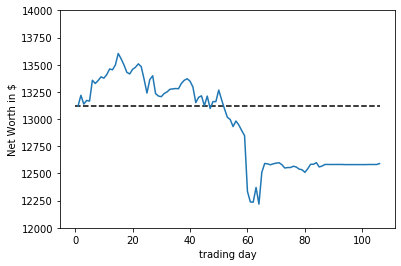

In [11]:
# Run the simulation with our actions
simulation = Trader(stock_prices, buy_or_sell)
simulation.stock_action()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Day 0, Amount of Stock: 10, Capital: 10000, Net Worth= 13120.0
Day 1, Amount of Stock: 10, Capital: 10000, Net Worth= 13210.0
Day 2, Amount of Stock: 10, Capital: 10000, Net Worth= 13128.7
Day 3, Amount of Stock: 10, Capital: 10000, Net Worth= 13166.2
Day 4, Amount of Stock: 10, Capital: 10000, Net Worth= 13160.0
Day 5, Amount of Stock: 10, Capital: 10000, Net

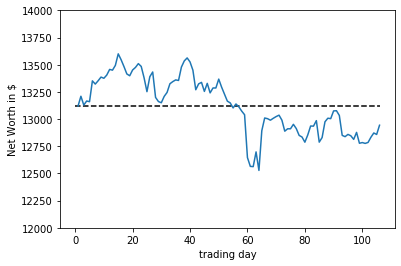

In [12]:
# As a comparison run a simlation with a passive trader not doing any action
simulation_default = Trader(stock_prices, [0] * len(stock_prices))
simulation_default.stock_action()